# Data Exploration - Keyword Feedback Analysis

This notebook explores the feedback data collected from user annotations.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [11]:
# Load feedback data
df = pd.read_csv('../../data/feedback.csv')
print(f"Total samples: {len(df)}")
df.head()

Total samples: 1218


,timestamp,doc_name,keyword,length,yake_score,f1_wfreq,f2_wcase,f3_wpos,f4_wrel,f5_wspread,label
0,2025-10-21T17:01:26.705307,requirements.txt,pygments,1,0.015010,1.448163,0.590616,0.094048,1.0,1.0,1
1,2025-10-21T17:01:26.705307,requirements.txt,ipython,1,0.018497,1.448163,0.000000,0.094048,1.0,1.0,1
2,2025-10-21T17:01:26.705307,requirements.txt,jsonschema,1,0.018497,1.448163,0.000000,0.094048,1.0,1.0,1
3,2025-10-21T17:01:26.705307,requirements.txt,jupyter,1,0.018497,1.448163,0.000000,0.094048,1.0,1.0,1
4,2025-10-21T17:01:26.705307,requirements.txt,core,1,0.018497,1.448163,0.000000,0.094048,1.0,1.0,0


## Basic Statistics

In [12]:
# Class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())
print(f"\nApproval rate: {df['label'].mean():.2%}")


Class Distribution:
label
1    668
0    550
Name: count, dtype: int64

Approval rate: 54.84%


In [13]:
# Feature statistics
feature_cols = ['length', 'yake_score', 'f1_wfreq', 'f2_wcase', 'f3_wpos', 'f4_wrel', 'f5_wspread']
df[feature_cols].describe()

,length,yake_score,f1_wfreq,f2_wcase,f3_wpos,f4_wrel,f5_wspread
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,1.827586,0.161198,0.872075,0.196163,0.257110,1.371326,0.303416
std,0.810669,0.198864,0.386042,0.345353,0.173792,0.235617,0.167679
min,1.000000,0.000144,0.416918,0.000000,0.094048,1.000000,0.047619
25%,1.000000,0.032116,0.601690,0.000000,0.094048,1.200000,0.200000
50%,2.000000,0.107798,0.686946,0.000000,0.221327,1.325758,0.250000
75%,2.000000,0.184694,1.082174,0.333333,0.326634,1.500000,0.375000
max,4.000000,1.422914,3.335344,1.429516,0.910235,2.500000,1.000000


## Class Balance Visualization

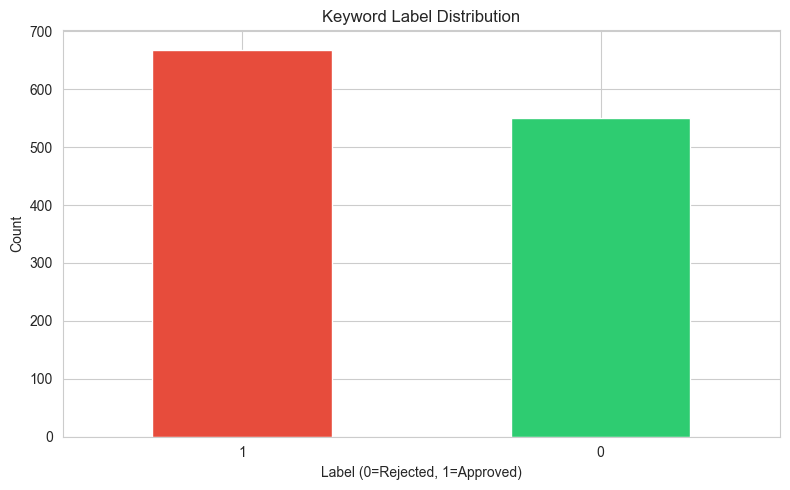

In [14]:
# Plot class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Keyword Label Distribution')
plt.xlabel('Label (0=Rejected, 1=Approved)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Distributions

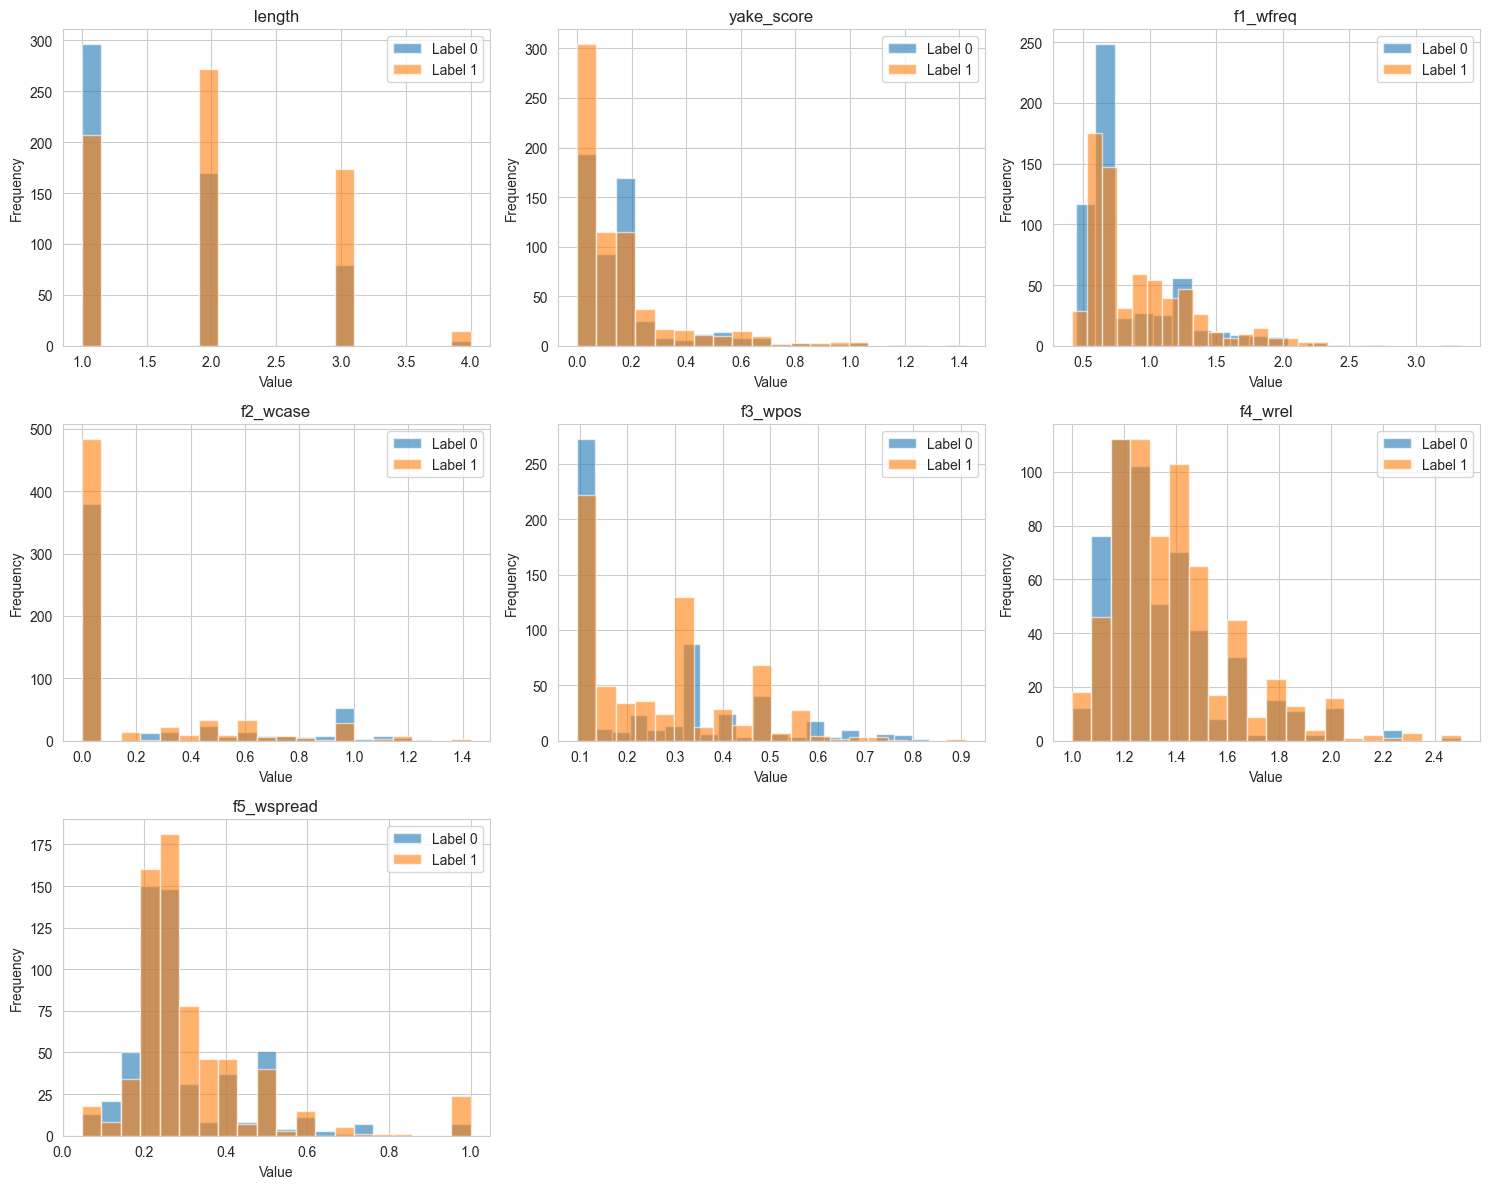

In [15]:
# Plot feature distributions by class
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(['length', 'yake_score'] + [f'f{i}_{name}' for i, name in enumerate(['wfreq', 'wcase', 'wpos', 'wrel', 'wspread'], 1)]):
    for label in [0, 1]:
        data = df[df['label'] == label][col]
        axes[idx].hist(data, alpha=0.6, label=f'Label {label}', bins=20)
    
    axes[idx].set_title(col)
    axes[idx].legend()
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Feature Correlations

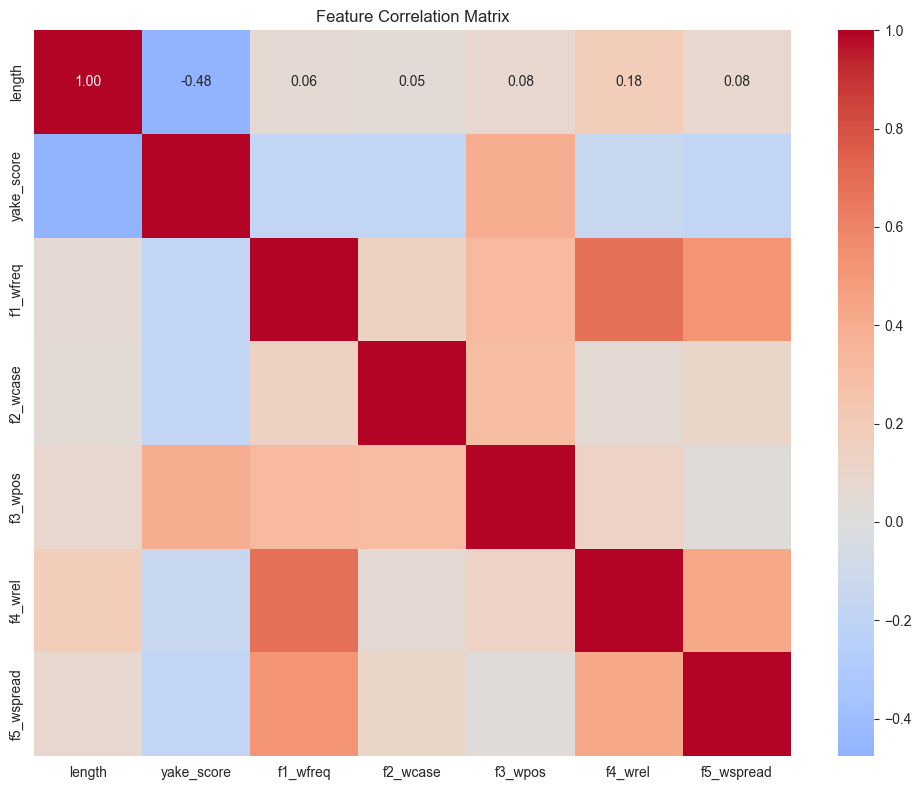

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df[feature_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Keyword Characteristics

In [17]:
# Compare approved vs rejected keywords
print("Approved Keywords (mean features):")
print(df[df['label'] == 1][feature_cols].mean())
print("\nRejected Keywords (mean features):")
print(df[df['label'] == 0][feature_cols].mean())

Approved Keywords (mean features):
length        1.995509
yake_score    0.155758
f1_wfreq      0.904699
f2_wcase      0.171594
f3_wpos       0.266837
f4_wrel       1.390679
f5_wspread    0.314260
dtype: float64

Rejected Keywords (mean features):
length        1.623636
yake_score    0.167805
f1_wfreq      0.832453
f2_wcase      0.226004
f3_wpos       0.245297
f4_wrel       1.347821
f5_wspread    0.290245
dtype: float64


In [18]:
# Sample keywords
print("Sample Approved Keywords:")
print(df[df['label'] == 1][['keyword', 'yake_score']].head(10))
print("\nSample Rejected Keywords:")
print(df[df['label'] == 0][['keyword', 'yake_score']].head(10))

Sample Approved Keywords:
            keyword  yake_score
0          pygments    0.015010
1           ipython    0.018497
2        jsonschema    0.018497
3           jupyter    0.018497
5          pydantic    0.018497
6             acres    0.051728
7         aiosqlite    0.051728
8            altair    0.051728
9   annotated-types    0.051728
10            anyio    0.051728

Sample Rejected Keywords:
                            keyword  yake_score
4                              core    0.018497
13                          blinker    0.051728
15            Key Discussion Points    0.000144
16             scaling Action Items    0.000340
20    infrastructure scaling Action    0.000997
26  provide technical specification    0.001464
31                        Dana Date    0.003796
33                      Add feature    0.012959
34               Experiments Author    0.013813
35                    Feature Flags    0.019024
